In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
a = tf.constant(0.0)
b = 2 * a
c = a + b
grad_a, grad_b = tf.gradients(xs=[a, b], ys=c, stop_gradients=[b])

sess = tf.InteractiveSession()
print(sess.run([grad_a, grad_b]))

[1.0, 1.0]


In [3]:
a = tf.constant(1.0)
b = 2 * a
c = a * b
grad_a, grad_b = tf.gradients(xs=[a, b], ys=c)

sess = tf.InteractiveSession()
print(sess.run([grad_a, grad_b]))

[4.0, 1.0]


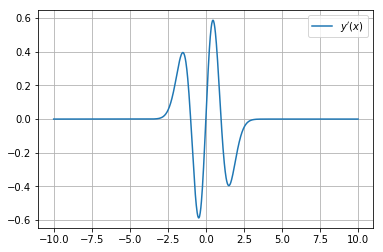

In [7]:
x = tf.constant(np.linspace(-10, 10.0, 1000))
y = (x ** 2) * tf.exp(- (x ** 2))
grad_y_x, = tf.gradients(ys=y, xs=x)

sess = tf.InteractiveSession()
x_, y_, grad_y_x_ = sess.run([x, y, grad_y_x])
# plt.plot(x_, y_, label='$y(x)$')
plt.plot(x_, grad_y_x_, label='$y\'(x)$')
plt.grid()
plt.legend()
plt.show()

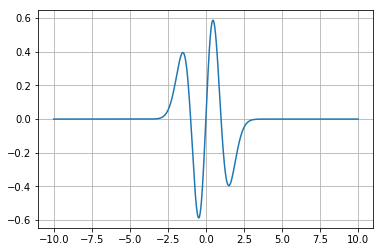

In [10]:
x = np.linspace(-10, 10, 1000)
grad = 2*x*np.exp(-x**2)*(1 - x**2)
plt.plot(x, grad)
plt.grid()
plt.show()

In [55]:
x = tf.constant([0.0, 0.0, 0.0], shape=(3, 1), dtype=tf.float32)
print(x)
w = tf.constant([-3.0, 2.0, -1.0], shape=(1, 3), dtype=tf.float32)
print(w)
y = tf.matmul(w, x)
print(y)
grad_y_x, = tf.gradients(xs=x, ys=y)
print(grad_y_x)

sess = tf.InteractiveSession()
print(sess.run(grad_y_x))

Tensor("Const_118:0", shape=(3, 1), dtype=float32)
Tensor("Const_119:0", shape=(1, 3), dtype=float32)
Tensor("MatMul_13:0", shape=(1, 1), dtype=float32)
Tensor("gradients_27/MatMul_13_grad/MatMul_1:0", shape=(3, 1), dtype=float32)
[[-3.]
 [ 2.]
 [-1.]]


In [60]:
W = tf.constant(np.tril(np.random.randint(1, 10, size=(3, 3))), dtype=tf.int32)
print(W)
x = tf.constant([0, 0, 0], shape=(3, 1), dtype=tf.int32)
print(x)
y = tf.matmul(W, x)
print(y)
grad_y_x, = tf.gradients(xs=x, ys=y)
print(grad_y_x)

sess = tf.InteractiveSession()
W_, grad_, = sess.run([W, grad_y_x])
print(W_)
print(grad_)

Tensor("Const_128:0", shape=(3, 3), dtype=int32)
Tensor("Const_129:0", shape=(3, 1), dtype=int32)
Tensor("MatMul_18:0", shape=(3, 1), dtype=int32)
Tensor("gradients_32/MatMul_18_grad/MatMul_1:0", shape=(3, 1), dtype=int32)
[[1 0 0]
 [1 5 0]
 [1 8 6]]
[[ 3]
 [13]
 [ 6]]


In [70]:
W = tf.constant(np.tril(np.random.randint(1, 10, size=(3, 3))), dtype=tf.float32, name="W")
print(W)
x = tf.Variable(initial_value=[[0], [0], [0]], dtype=tf.float32, name="x")
print(x)
y = tf.matmul(W, x, name="y")
print(y)

learning_rate = 0.9
grads_and_vars = tf.train.GradientDescentOptimizer(learning_rate).compute_gradients(y)
for grad, var in grads_and_vars:
    print(var, grad)
    print()

Tensor("W_3:0", shape=(3, 3), dtype=float32)
<tf.Variable 'x_3:0' shape=(3, 1) dtype=float32_ref>
Tensor("y_2:0", shape=(3, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(3,) dtype=float32_ref> None

<tf.Variable 'Variable_1:0' shape=(3, 1) dtype=float32_ref> None

<tf.Variable 'x:0' shape=(3, 1) dtype=float32_ref> None

<tf.Variable 'x_1:0' shape=(3, 1) dtype=float32_ref> None

<tf.Variable 'x_2:0' shape=(3, 1) dtype=float32_ref> None

<tf.Variable 'x_3:0' shape=(3, 1) dtype=float32_ref> Tensor("gradients_37/y_2_grad/tuple/control_dependency_1:0", shape=(3, 1), dtype=float32)

